# MODULE 4: Linear Regression - Assignment

In this assignment, we will show our understanding on how to apply the Linear Regression model to a selected dataset in Python.

Please, find the dataset on Canvas in the FILES section.

Description of the `advertising` data:

Advertising data sales (in thousands of units) for a particular product advertising budget (in thousands of dollars) for TV.

## **STEP 1: Pre-process the dataset**

In this step, you need to do the following:

*   Import the necessary libraries
*   Load the dataset
*   Explore the dataset
*   Summarize the dataset
*   Analyze the dataset


### **Import the necessary libraries**

In [1]:
#Import the libraries
import pandas as pd
import numpy as py
import seaborn as sn
import matplotlib.pyplot as plt


### **Load the dataset**

Comments:

In [2]:
#Load dataset
df = pd.read_csv("/content/advertising.csv")

### **Explore the dataset**

**Note:**

Here we can also check outliers, missing values, etc. You can apply all the DATA CLEANING skills that you learn in the Advanced Python course.

In [3]:
#Show the head of the data
df.head()


,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9


In [4]:
#Show the shape of the data
df.shape


(200, 2)

In [7]:
#Get the info of the dataset with "advertising.info()"
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In the next step we will find the variable tyoes which we can also find them using `.info()` as we did in the last step.

In [8]:
#Show the types of the variables
var_types = df.dtypes
var_types


,0
TV,float64
Sales,float64


In [9]:
#Show the total null values in the data frame
df.isnull().sum()


,0
TV,0
Sales,0


### **Summarize the data**

In [10]:
#Use describe() for summarizing the data
#Round it to 2 decimals places
round(df.describe(),2)


,TV,Sales
count,200.00,200.00
mean,147.04,15.13
std,85.85,5.28
min,0.70,1.60
25%,74.38,11.00
50%,149.75,16.00
75%,218.82,19.05
max,296.40,27.00


### **Analyze the data**

**Visualize the data**

array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

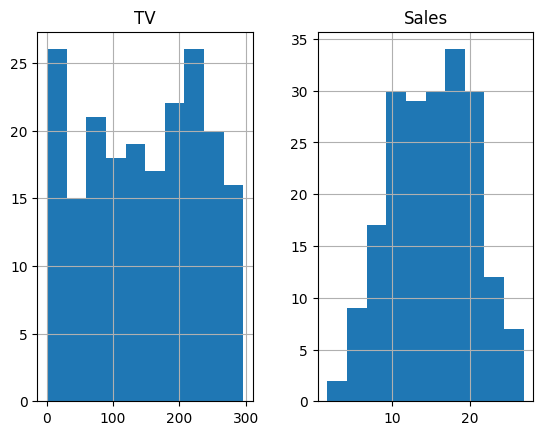

In [12]:
#Plot Histograms
hist_visual = df.hist(bins=10)
hist_visual


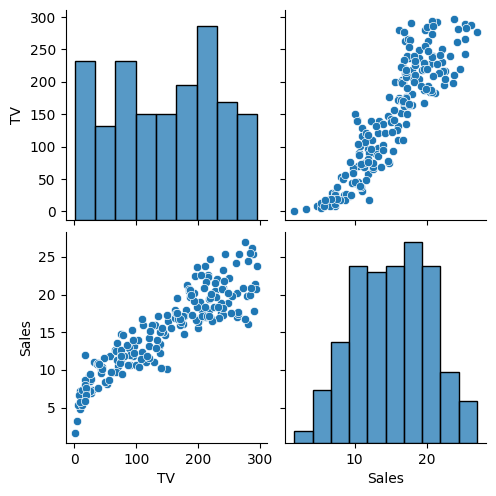

In [13]:
#Plot a pair plot to see the relationship between the variables
sn.pairplot(df)


<Axes: >

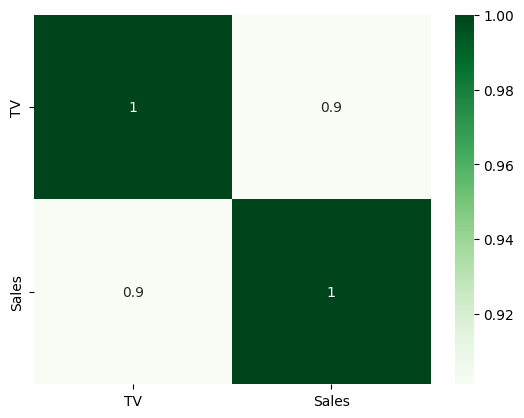

In [18]:
#Check correlation between TV and Sales
corr_matrix = df.corr()

#Heatmap
sn.heatmap(corr_matrix, annot=True, cmap= 'Greens')


In [19]:
#Using the method "kendall" when using "".corr"
df.corr(method= 'kendall')


,TV,Sales
TV,1.000000,0.727994
Sales,0.727994,1.000000


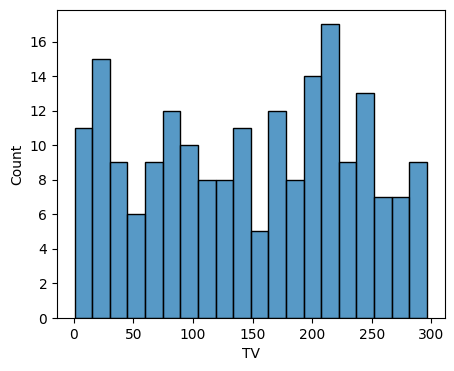

In [25]:
#Do an outlier analysis for TV
plt.figure(figsize=(5, 4))
sn.histplot(df['TV'], bins=20)
plt.show()


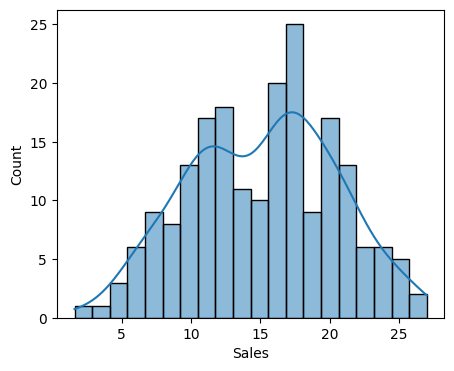

In [24]:
#Do an outlier analysis for Sales(the target variable)
plt.figure(figsize=(5, 4))
sn.histplot(df['Sales'], bins=20, kde=True)
plt.show()


**Question: Do you see any considerable outliers?**

**Answer:** Yes there are a few

**Plotting Salary vs. YearsExperience**

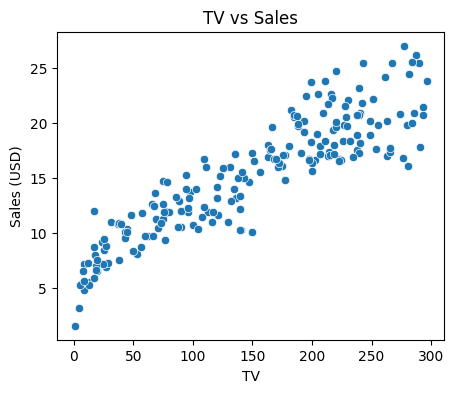

In [27]:
#Plot a scatter plot to see how Sales is related to TV variable
plt.figure(figsize=(5,4))
sn.scatterplot(x='TV', y='Sales', data=df)
plt.title('TV vs Sales')
plt.xlabel('TV')
plt.ylabel('Sales (USD)')
plt.show()

**Question: What can you see here about the correlation?**

More TVs = More Sales

## **STEP 2: Apply the Machine learning Model**:

Here we will apply the ML model:

*   Import the necessary libraries
*   Build the model
*   Display the results



### **Import the necessary libraries**

In [28]:
#Import the library for splitting train/test data
from sklearn.model_selection import train_test_split

#Import for using the ML model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm #Linear regression with statsmodels


### **Buil the model**

First we will prepare our dataframes for the x-array and y-array

In [35]:
#Create a X and Y data frames
X = df['TV']              #used to make predictions
Y = df['Sales']           #we'll predict this variable

Split the dataset into training and test dataset: Training 70% and test 30% sets

In [36]:
#Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3)


In [37]:
#Print the shape of the training and test data for X and Y
print("The shape of X_train is: ", X_train.shape)
print("The shape of X_test is: ", X_test.shape)
print("The shape of Y_train is: ", Y_train.shape)
print("The shape of Y_test is: ", Y_test.shape)

The shape of X_train is:  (140,)
The shape of X_test is:  (60,)
The shape of Y_train is:  (140,)
The shape of Y_test is:  (60,)


In [65]:
#The model requires a 2-D array
#Make the changes necessary for this
x_train = X_train.values.reshape(-1, 1)
x_test = X_test.values.reshape(-1, 1)

print("x_train shape is: ", x_train.shape)
print("x_test shape is: ", x_test.shape)

x_train shape is:  (140, 1)
x_test shape is:  (60, 1)


We build our linear regression model. We already import the necessary library.

In [66]:
#Set Linear Regression Model
model = LinearRegression()


Train the model with the training data. We use `.fit()` for that.

In [67]:
#Fit the training data
response = model.fit(x_train, Y_train)


### **Display Results**

In [68]:
#Get the intercept and coefficient of the model
intercept = response.intercept_

coeff = response.coef_


In [69]:
#Print the intercept and coefficient of the model
print("The intercept is: ", intercept)
print("The coefficient is: ", coeff)

The intercept is:  6.928475121355413
The coefficient is:  [0.056007]


In [70]:
#Print the standard form using the intercept and coeeficient
print("Then, we have: y= %d + %d * x"  %(intercept, coeff))


Then, we have: y= 6 + 0 * x


/tmp/ipython-input-3284058802.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Then, we have: y= %d + %d * x"  %(intercept, coeff))


Using the model to predict: Here we use the test data to validate the model and make predictions.

We use `.predict`

In [71]:
#Use x to predict the response y
Y_pred = model.predict(x_test)
print("The predictions of the x_test values using the model: ")
print(Y_pred)

The predictions of the x_test values using the model: 
[ 8.36225441  7.58375706 11.13460109 20.54937838 19.04839068 10.14887782
 16.52247482  9.34237697  8.02621239 13.07804411 12.28834536 14.30459748
  9.05674125 12.55157827  8.99513355 10.26649253  8.69269573  7.89179558
 22.81206132 19.16600539 11.14580249 11.03938918 11.11219828  8.32865021
 14.78625771  9.14075176 22.68884591 16.0744188  16.84171474 20.9806323
 19.65326632 22.64964101 22.62163751 14.45021569 11.15700389 17.15535396
 14.93187592 20.35895456  7.23091294 23.37213135 11.95230334 18.06826812
 18.51632415 15.31832425 13.96855546 14.74145211  7.41573605 18.35950454
 22.94647813 16.27044331 13.66051694 11.72827532 14.72465001 19.47404391
 18.88036967 18.11867442  6.96768002 18.88597037  9.63361339 12.20433485]


## **STEP 3: Evaluate the Machine learning Model**:

In this section, we will evaluate the model as follows:

*   Validate the performance of the built model
*   Use a performance metric



In [72]:
#Import the library for the error metrics
from sklearn import metrics

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [76]:
#Find the R^2 score
r2_result = r2_score(Y_test, Y_pred) #using the Y_test and the prediction (Y_pred)
print("The R^2 score is ", r2_result)

The R^2 score is  0.775954386419019


In [77]:
#Find the MSE
MSE = mean_squared_error(x_test,Y_pred)
print("The MSE is ", MSE)


The MSE is  21067.139740968265


In [64]:
#Predict Salary with TV= 147
pred_Example = model.predict([[5.5]])
pred_Example


array([7.23651364])

**Conclusion: Write a short conclusion about the model**



With an R^2 of .77, it's a pretty decent model for predicting sales off of TVs. There's a positive relationship between the two despite there still being possibilities for variation.